In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [3]:
# Read the data
df = pd.read_csv('WELFake_Dataset.csv')

# Drop rows with missing values in the 'text' column
df.dropna(subset=['text'], inplace=True)

# Get the features and labels
X = df['text']  # Assuming 'text' is the column containing the text data
y = df['label']  # Assuming 'label' is the column containing the labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training and testing data
tfidf_train = tfidf_vectorizer.fit_transform(X_train.astype('U'))
tfidf_test = tfidf_vectorizer.transform(X_test.astype('U'))

In [ ]:
# 1. Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(tfidf_train, y_train)
nb_pred = nb_model.predict(tfidf_test)
nb_report = classification_report(y_test, nb_pred)

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(tfidf_train, y_train)
lr_pred = lr_model.predict(tfidf_test)
lr_report = classification_report(y_test, lr_pred)

# 3. Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(tfidf_train, y_train)
dt_pred = dt_model.predict(tfidf_test)
dt_report = classification_report(y_test, dt_pred)


In [4]:
# Print the classification reports
print("Multinomial Naive Bayes Report:")
print(nb_report)
print("Logistic Regression Report:")
print(lr_report)
print("Decision Tree Report:")
print(dt_report)


Multinomial Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7010
           1       0.87      0.86      0.87      7409

    accuracy                           0.86     14419
   macro avg       0.86      0.86      0.86     14419
weighted avg       0.86      0.86      0.86     14419

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7010
           1       0.94      0.95      0.94      7409

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7010
           1       0.90      0.94      0.92      7409

    accuracy                           0.92     14419
   macro avg       0.92      0.92      0.92   

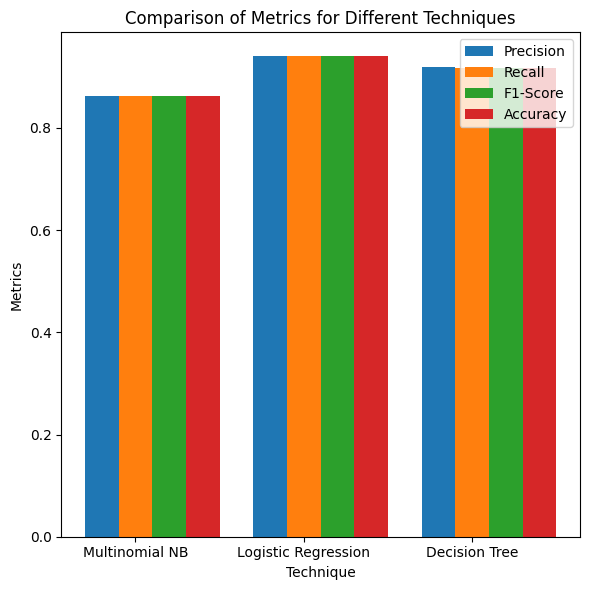

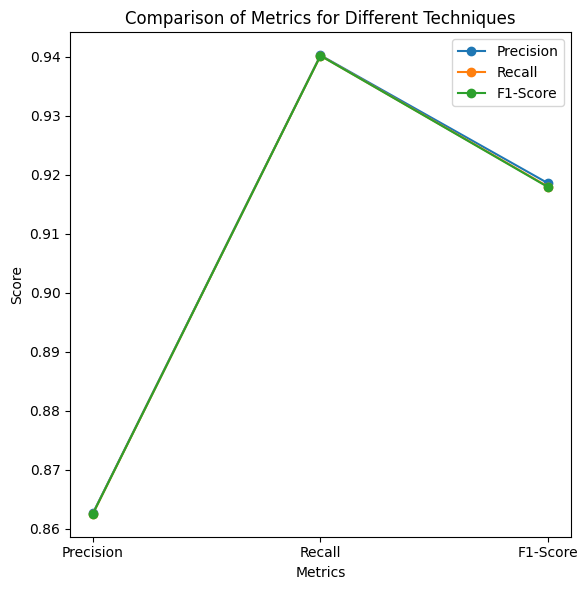

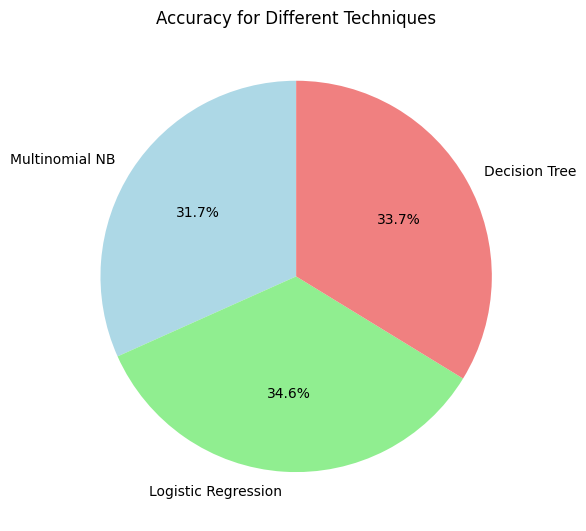

In [17]:
# Calculate precision, recall, f1-score, and accuracy for each technique
nb_report = classification_report(y_test, nb_pred, output_dict=True)
lr_report = classification_report(y_test, lr_pred, output_dict=True)
dt_report = classification_report(y_test, dt_pred, output_dict=True)

# Extract precision, recall, f1-score, and accuracy values
precision = [nb_report['weighted avg']['precision'], lr_report['weighted avg']['precision'], dt_report['weighted avg']['precision']]
recall = [nb_report['weighted avg']['recall'], lr_report['weighted avg']['recall'], dt_report['weighted avg']['recall']]
f1_score = [nb_report['weighted avg']['f1-score'], lr_report['weighted avg']['f1-score'], dt_report['weighted avg']['f1-score']]
accuracy = [accuracy_score(y_test, nb_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred)]

# Comparison graph - Bar Plot
labels = ['Multinomial NB', 'Logistic Regression', 'Decision Tree']

# Bar positions for different metrics
bar_positions = np.arange(len(labels))
bar_width = 0.2

# Plotting the metrics as bar plots
plt.figure(figsize=(6, 6))
plt.bar(bar_positions - bar_width, precision, width=bar_width, label='Precision')
plt.bar(bar_positions, recall, width=bar_width, label='Recall')
plt.bar(bar_positions + bar_width, f1_score, width=bar_width, label='F1-Score')
plt.bar(bar_positions + (2 * bar_width), accuracy, width=bar_width, label='Accuracy')
plt.xlabel('Technique')
plt.ylabel('Metrics')
plt.title('Comparison of Metrics for Different Techniques')
plt.xticks(bar_positions, labels)
plt.legend()
plt.tight_layout()
plt.show()

# Line graph for metrics
plt.figure(figsize=(6, 6))
metrics = ['Precision', 'Recall', 'F1-Score']
plt.plot(metrics, precision, marker='o', label='Precision')
plt.plot(metrics, recall, marker='o', label='Recall')
plt.plot(metrics, f1_score, marker='o', label='F1-Score')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Techniques')
plt.legend()
plt.tight_layout()
plt.show()

# Pie chart for accuracy
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.pie(accuracy, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Accuracy for Different Techniques')
plt.tight_layout()
plt.show()